In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Input, Reshape, UpSampling2D, InputLayer, Lambda, ZeroPadding2D, Cropping2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.utils import to_categorical
# from keras.utils import np_utils
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D
from keras.callbacks import EarlyStopping
from keras import backend as K
# from keras import backend as objectives
from tensorflow.keras.losses import mse, binary_crossentropy
from skimage import io 
import matplotlib.pyplot as plt
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from sklearn.model_selection import train_test_split
import zipfile
import os
from pathlib import Path
import skimage
import skimage.io as io
import cv2 as cv2
from tensorflow.python.framework.ops import disable_eager_execution
import visualkeras
from PIL import ImageFont
# from PIL import ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True


In [2]:
file_path = r"C:\Users\Saaqib\Documents\Imperial\Research Project\SWET_data"
# file_path = r"/rds/general/user/sim21/home/SWET_data"
img_path = []
files = os.listdir(file_path)
for root, directories, files in os.walk(file_path, topdown=False):
	for name in files:
		img_path.append(os.path.join(root, name))

In [3]:
def get_input(path):
    """get specific image from path"""
    img = io.imread(path)
    return img

# def preprocess_input(img):
#     # convert between 0 and 1
#     return img.astype('float32')

In [49]:
x = []
y = []
for file_path in img_path[0:20]:
    input = get_input(file_path)
    input = cv2.resize(input,(256,256))
    # input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)
    input = skimage.color.rgb2gray(input)
    # input = preprocess_input(input)
    input.astype('float32') / 255.0 - 0.5
    x.append(input)
    y.append(input)
x = np.array(x)
y = np.array(y)

(256, 256)

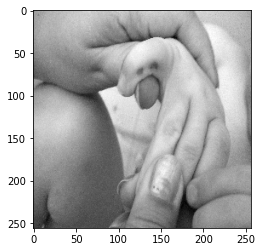

In [50]:
plt.imshow(x[1].reshape(256,256,1), cmap ='gray')
np.shape(x[1])

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
x_train = x_train.reshape(-1,256,256,1)
x_test = x_test.reshape(-1,256,256,1)
y_train = x_train.reshape(-1,256,256,1)
y_test = x_test.reshape(-1,256,256,1)

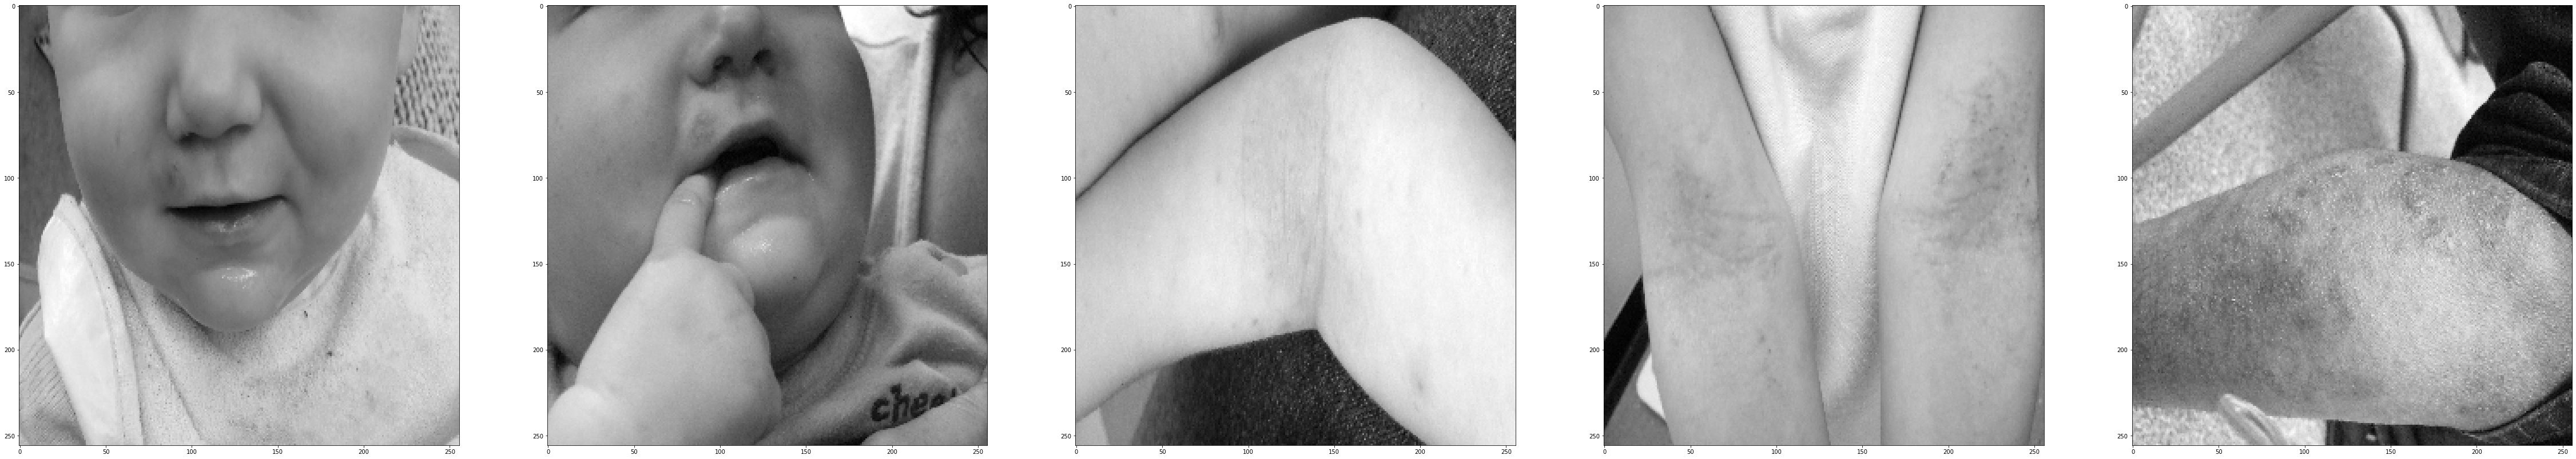

In [53]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(x_train[i], cmap = 'gray')

In [54]:
input_layer = Input(shape=(256,256,1))

x = Conv2D(32,(3,3),activation = 'relu', padding = 'same')(input_layer)    
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding ='same')(x)
x = Conv2D(64,(3,3),activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding ='same')(x)
x = Conv2D(64,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding ='same')(x)
x = Conv2D(128,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
latent_view = MaxPooling2D((2,2), padding ='same')(x)

In [55]:
# decoding architecture

x = Conv2DTranspose(128,(3,3), activation = 'relu', padding = 'same')(latent_view)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
# x = Cropping2D([[0,1],[0,1]])(x)
x = Conv2DTranspose(64,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
# x = Cropping2D([[0,1],[0,1]])(x)
x = Conv2DTranspose(64,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(32,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2DTranspose(1,(3,3), padding ='same')(x)

In [56]:
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization_48 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
batch_normalization_49 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 64, 64)        0  

In [37]:
# font = ImageFont.truetype("arial.ttf", 32)
# visualkeras.layered_view(model,legend=True, scale_xy=1, scale_z=1, max_z=1000, draw_volume=False, font = font).show() # display using your system viewer
# visualkeras.layered_view(model,legend=True, scale_xy=1, scale_z=1, max_z=1000, draw_volume=False, font = font, to_file='output.png') # write to disk
# visualkeras.layered_view(model,legend=True, scale_xy=1, scale_z=1, max_z=1000, draw_volume=False, font = font, to_file='output.png').show() # write and show

In [15]:
# model1 = Model(input_layer, output_layer)
# model1.compile(optimizer='adam', loss='binary_crossentropy')
# model1.summary()

In [57]:
history = model.fit(x_train, y_train,
                epochs=2,
                batch_size=4,
                validation_data=(x_test, y_test)).history

Epoch 1/2
4/4 [==============================] - 6s 1s/step - loss: 1.6369 - val_loss: 0.2452
Epoch 2/2
4/4 [==============================] - 4s 966ms/step - loss: 0.4441 - val_loss: 0.2042


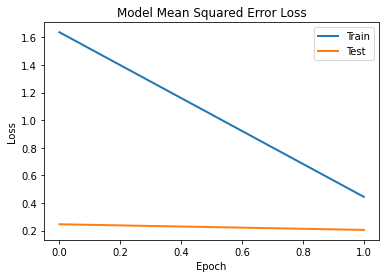

In [58]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model Mean Squared Error Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

Latent Space

In [59]:
# compile the model
model_latent = Model(input_layer, latent_view)
model_latent.compile(optimizer='adam', loss='mse')
# model_latent.summary()

IndexError: index 4 is out of bounds for axis 0 with size 4

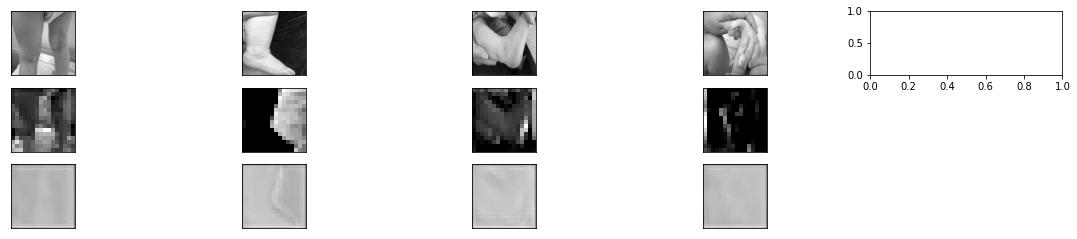

In [61]:
n = np.random.randint(0,len(y_test))
preds = model_latent.predict(y_test)
pred = model.predict(y_test)

plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(256,256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display latent space
    ax = plt.subplot(3,5, i+1+5)
    plt.imshow(preds[i, :, :, i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, 5, i + 1 + 5+5)
    plt.imshow(pred[i].reshape(256,256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
# issue is that 256,256 produces more of a latent represnatation than the higher image size

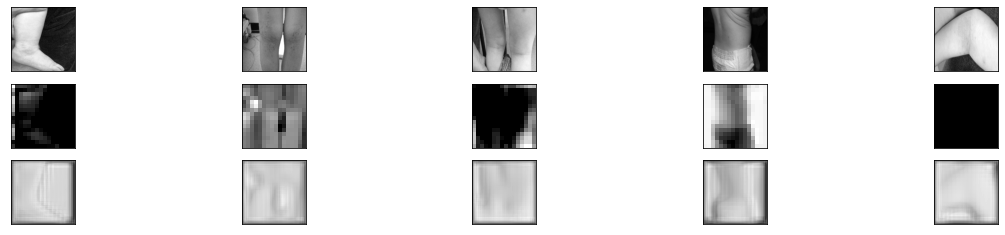

In [29]:
preds = model_latent.predict(y_test)
pred = model.predict(y_test)

plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(256,256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display latent space
    ax = plt.subplot(3,5, i+1+5)
    plt.imshow(preds[i, :, :, i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, 5, i + 1 + 5+5)
    plt.imshow(pred[i].reshape(256,256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# plt.show()
# plt.savefig('my_plot3.png')

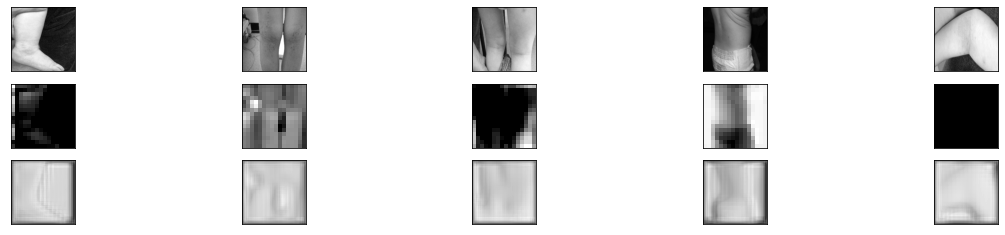

In [31]:
preds1 = model_latent1.predict(y_test)
pred1 = model1.predict(y_test)

plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(256,256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display latent space
    ax = plt.subplot(3,5, i+1+5)
    plt.imshow(preds1[i, :, :, i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, 5, i + 1 + 5+5)
    plt.imshow(pred1[i].reshape(256,256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# plt.show()
# plt.savefig('my_plot3.png')